## setup
1. random seed set up  
2. load data  

In [36]:
import numpy as np

my_seed = 0
np.random.seed(my_seed)

In [37]:
import pandas as pd

raw_data = pd.read_excel('data.xlsx')
print(len(raw_data))
raw_data.head()

1045


,Unnamed: 0,Id,Name,Icon,Type(s),TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,Number of battles,Number of wins,Win rates
0,0,1,Bulbasaur,./pokemon_icons/1. Bulbasaur.jpg,"['GRASS', 'POISON']",318,45,49,49,65,65,45,3.0,2.0,0.666667
1,1,2,Ivysaur,./pokemon_icons/2. Ivysaur.jpg,"['GRASS', 'POISON']",405,60,62,63,80,80,60,33.0,25.0,0.757576
2,2,3,Venusaur,./pokemon_icons/3. Venusaur.jpg,"['GRASS', 'POISON']",525,80,82,83,100,100,80,184.0,127.0,0.690217
3,3,3,Mega Venusaur,./pokemon_icons/3. Mega Venusaur.jpg,"['GRASS', 'POISON']",625,80,100,123,122,120,80,NaN,NaN,NaN
4,4,4,Charmander,./pokemon_icons/4. Charmander.jpg,['FIRE'],309,39,52,43,60,50,65,9.0,7.0,0.777778


some columns are not needed, [Ids, Names, Icons, Types]   
also rename the columns to no space

In [38]:
data = raw_data

columns_to_drop = ['Unnamed: 0', 'Id', 'Name', 'Type(s)', 'Icon']
data.drop(labels=columns_to_drop, axis='columns', inplace=True)

new_column_mapping = {name:name.replace(' ', '') for name in data.columns}
data.rename(columns = new_column_mapping, inplace=True)

data.describe()

,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Numberofbattles,Numberofwins,Winrates
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,720.000000,720.000000,720.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,41.112500,28.162500,0.705632
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,49.191289,33.603596,0.128431
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,0.500000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,5.000000,3.000000,0.647059
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,16.000000,11.000000,0.679739
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,71.000000,49.000000,0.739873
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,203.000000,139.000000,1.000000


comments: 
- 
___

## data cleaning  
1. drop nan rows 
2. kicking out less then 10 battles and 0 wins and 100% wins

In [5]:
data.dropna(inplace=True)
print(len(data))
data.head()

720


,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Numberofbattles,Numberofwins,Winrates
0,318,45,49,49,65,65,45,3.0,2.0,0.666667
1,405,60,62,63,80,80,60,33.0,25.0,0.757576
2,525,80,82,83,100,100,80,184.0,127.0,0.690217
4,309,39,52,43,60,50,65,9.0,7.0,0.777778
5,405,58,64,58,80,65,80,23.0,17.0,0.739130


In [8]:
data = data[ data['Numberofbattles'] > 10 ]

data = data[ data['Winrates'] != 1 ]
data = data[ data['Winrates'] != 0 ]

print(len(data))
data.describe()

412


,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Numberofbattles,Numberofwins,Winrates
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,473.126214,77.679612,86.800971,80.196602,77.405340,77.283981,73.759709,68.339806,46.762136,0.684354
std,89.642103,27.827401,28.245693,30.753675,29.039084,26.198836,28.880373,49.897862,34.081436,0.054578
min,200.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,11.000000,6.000000,0.523810
25%,420.000000,60.000000,65.000000,60.000000,55.000000,60.000000,50.000000,22.750000,16.000000,0.660094
50%,490.000000,75.000000,85.000000,75.000000,75.000000,75.000000,71.000000,55.000000,38.500000,0.680414
75%,525.000000,90.000000,105.000000,95.000000,99.250000,95.000000,95.000000,101.250000,70.000000,0.707583
max,680.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,203.000000,139.000000,0.916667


comments: 
- 
___

## initial data and OLS summary

In [10]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Winrates ~ HP + Attack + Defense + SpecialAttack + SpecialDefense + Speed", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Winrates   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7497
Date:                Mon, 31 May 2021   Prob (F-statistic):              0.610
Time:                        15:47:33   Log-Likelihood:                 616.32
No. Observations:                 412   AIC:                            -1219.
Df Residuals:                     405   BIC:                            -1190.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7028      0.015     47.520      0.000       0.674       0.732
HP                -0.0001      0.000     -1.100      0.272      -0.000     9.2e-05
Attack         -9.714e-05      0.000     -0.876      0.382      -0.000       0.000
Defense        -3.736e-05      0.000     -0.342      0.733      -0.000       0.000
SpecialAttack  -5.257e-05      0.000     -0.495      0.621      -0.000       0.000
SpecialDefense  1.032e-05      0.000      0.083      0.934      -0.000       0.000
Speed           7.164e-05      0.000      0.677      0.499      -0.000       0.000
==============================================================================
Omnibus:                       37.458   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.417   Prob(JB):                     8.88e-23
Kurtosis:                       5.285   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Winrates ~ HP + Attack + Defense + SpecialAttack + Speed", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Winrates   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.044
Date:                Mon, 31 May 2021   Prob (F-statistic):             0.0705
Time:                        16:04:17   Log-Likelihood:                 461.68
No. Observations:                 720   AIC:                            -911.4
Df Residuals:                     714   BIC:                            -883.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7616      0.020     37.981      0.000       0.722       0.801
HP               -0.0003      0.000     -1.530      0.126      -0.001    8.92e-05
Attack        -9.822e-05      0.000     -0.476      0.634      -0.001       0.000
Defense          -0.0002      0.000     -1.135      0.257      -0.001       0.000
SpecialAttack     0.0002      0.000      0.945      0.345      -0.000       0.001
Speed            -0.0003      0.000     -1.792      0.074      -0.001    3.33e-05
==============================================================================
Omnibus:                       68.586   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.707
Skew:                           0.793   Prob(JB):                     1.49e-19
Kurtosis:                       3.613   Cond. No.                         700.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

comments:  
- p-values suggest no relationship between BaseStats to win rate
- we got hige conditional number, suggesting multicollinearity, so lets plot something to have look 
___

## plots
1. win rates against each individual feature  
2. correlaterion matrix heatmap

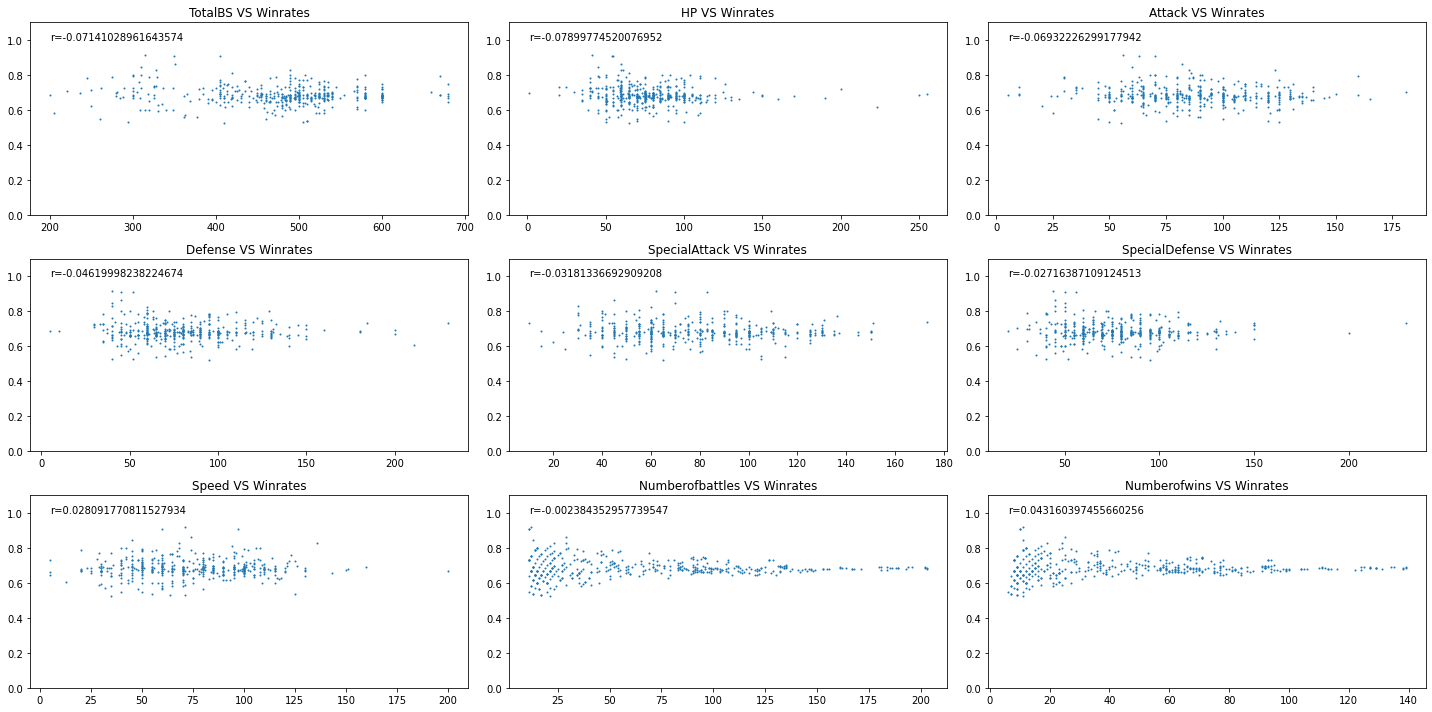

In [12]:
from matplotlib import pyplot as plt

verus = ['TotalBS', 'HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed', 'Numberofbattles', 'Numberofwins']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))

for i, ax in enumerate(axes.ravel()):
    ax.scatter(data[verus[i]], data['Winrates'], s=1)
    ax.set(ylim =(0, 1.1))
    ax.set_title(verus[i] + ' VS ' + 'Winrates')
    r = np.corrcoef(data[verus[i]], data['Winrates'])[0][1]
    ax.text(min(data[verus[i]]), 1.0, f'r={r}')

fig.tight_layout()

In [13]:
corrMatrix = data.corr()
corrMatrix

,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Numberofbattles,Numberofwins,Winrates
TotalBS,1.000000,0.529235,0.579634,0.487071,0.613962,0.580528,0.364450,0.269245,0.268157,-0.071410
HP,0.529235,1.000000,0.255822,0.040687,0.205872,0.227797,-0.028019,0.173344,0.170082,-0.078998
Attack,0.579634,0.255822,1.000000,0.307096,0.105558,-0.008416,0.149095,0.109081,0.107814,-0.069322
Defense,0.487071,0.040687,0.307096,1.000000,-0.003860,0.394523,-0.246601,0.219437,0.221691,-0.046200
SpecialAttack,0.613962,0.205872,0.105558,-0.003860,1.000000,0.312419,0.319282,0.089646,0.087532,-0.031813
SpecialDefense,0.580528,0.227797,-0.008416,0.394523,0.312419,1.000000,-0.050753,0.184481,0.187964,-0.027164
Speed,0.364450,-0.028019,0.149095,-0.246601,0.319282,-0.050753,1.000000,0.070841,0.068414,0.028092
Numberofbattles,0.269245,0.173344,0.109081,0.219437,0.089646,0.184481,0.070841,1.000000,0.998235,-0.002384
Numberofwins,0.268157,0.170082,0.107814,0.221691,0.087532,0.187964,0.068414,0.998235,1.000000,0.043160
Winrates,-0.071410,-0.078998,-0.069322,-0.046200,-0.031813,-0.027164,0.028092,-0.002384,0.043160,1.000000


<AxesSubplot:>

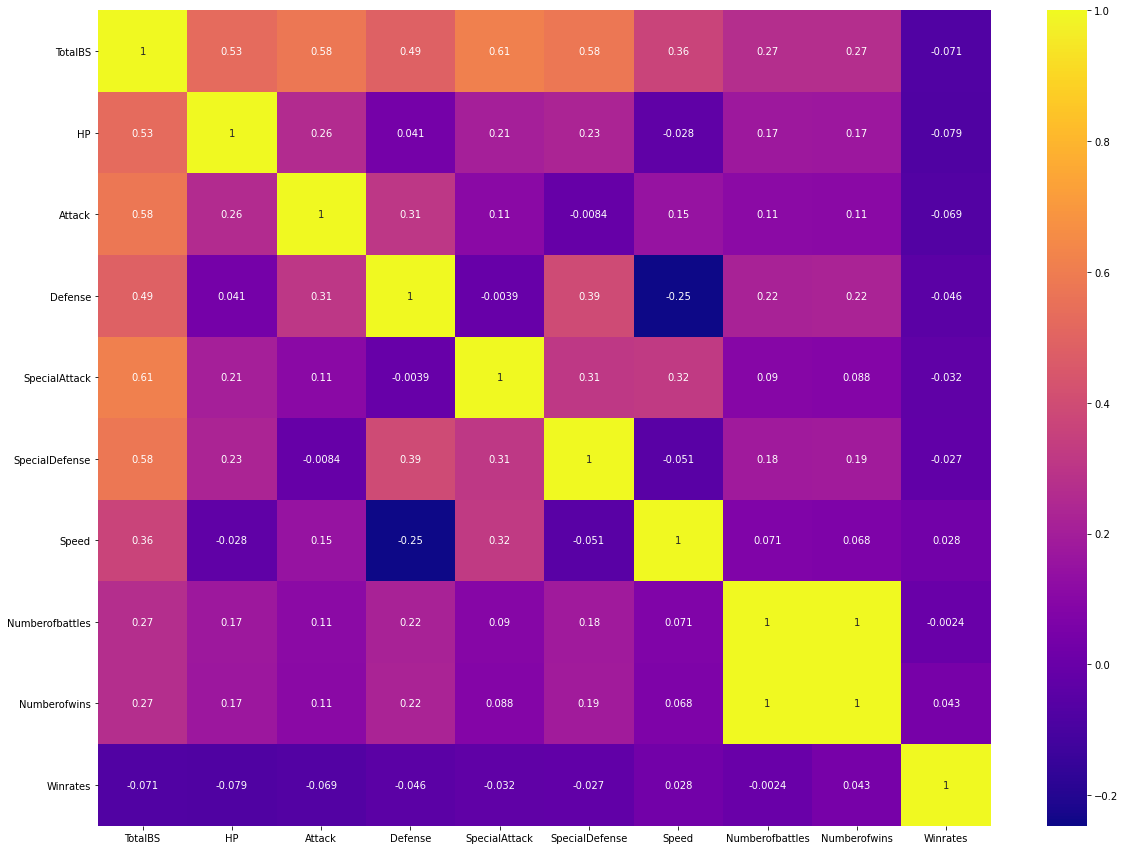

In [14]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,15)) 
sn.heatmap(corrMatrix, annot=True, cmap='plasma', ax=ax)


comments: 
- 
___

# missinsidnfain foasdnf aoisdfsa

comments: 
- 
___

## training 
1. assigning X (features) and y (labels)
2. numpy-array-rise (verb) them
3. train test split (test set is for final proformance evaluation, within training the term 'validation set' is used)

In [16]:
X = data[ ['HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']]
y = data['Winrates']

X = X.to_numpy(dtype=int, copy=True)
y = y.to_numpy(dtype=float, copy=True)

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (412, 6)
y shape: (412,)


In [17]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=my_seed)

standardising the data lead to enormous results, so I gave up doing it (if i do regulurasation then i need this)

    standardising.fit(X_train)
    X_train_standardised = standardising.fit_transform(X_train, y_train)
    lr = LinearRegression()
    lr.fit(X_train_standardised, y_train)
    y_pred = lr.predict(X_test)
    mean_squared_error(y_pred, y_test)

comments: 
- 
___

## modeling 
1. try linear regression 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_pred, y_test)

# r^2 too

0.0037735168613209644

In [19]:
lr.coef_

array([-8.65878383e-05, -1.98007213e-04,  2.84021156e-05,  2.99909694e-06,
        8.99615011e-06,  7.89949830e-05])

In [20]:
lr.predict( [[0,0,0,0,0,0]] )

array([0.69647307])

## k-fold

In [25]:
from sklearn.metrics import mean_squared_error

# k-fold function here
def k_fold(dataset: any, n_splits: int=5):
    choose_from = np.array_split(dataset, n_splits)
    for i, chuck in enumerate(choose_from): 
        # print(choose_from[:i].__len__(), choose_from[i+1:].__len__())
        training = np.concatenate(choose_from[:i] + choose_from[i+1:]) # TODO investigate np.concatenate() and flatten array
        yield (training, chuck)

def k_fold_training(X, y, model, loss_function, n_splits=5): 
    loss = 0
    for (X_train, X_validation), (y_train, y_validation) in zip(k_fold(X, n_splits), k_fold(y, n_splits)): 
        
        model.fit(X_train, y_train)

        try: 
            y_pred = model.predict(X_validation)
        except: 
            continue

        each_fold_loss = loss_function(y_pred, y_validation)
        loss += each_fold_loss

    print(f'K-Fold estimated loss: {round(loss/n_splits*100, 3)} %')

def test_interesting_cases(X, y, model, loss_function, n_splits=5): 
    # training 
    k_fold_training(X, y, model, loss_function, n_splits=5)
    # interesting cases 
    extreme_cases = { # '[HP ATK DEF Sp.ATK Sp.DEF SPD]'
        'theoretical max' : [255, 255, 255, 255, 255, 255],
        'legendary' : [97.1, 112.73, 100.85, 115.76, 105.46, 94.69], # https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon
        'mythical_avg' : [81.39, 109.78, 92.91, 118, 99.35, 105.52], # https://bulbapedia.bulbagarden.net/wiki/Mythical_Pok%C3%A9mon
        'mythical' : [100, 100, 100, 100, 100, 100],
        'average' : [80, 80, 80, 80, 80, 80],
        'weak' : [50, 50, 50, 50, 50, 50], 
        'max HP' : [255, 80, 80, 80, 80, 80], 
        'max Attack' : [80, 255, 80, 80, 80, 80], 
        'max Defense' : [80, 80, 255, 80, 80, 80], 
        'max SpecialAttack' : [80, 80, 80, 255, 80, 80], 
        'max SpecialDefense' : [80, 80, 80, 80, 255, 80], 
        'Speed Attack' : [80, 255, 80, 80, 80, 255], 
        'Speed SpecialAttack' : [80, 80, 80, 255, 80, 255], 
        'Tank Attack' : [255, 255, 80, 80, 80, 80], 
        'Tank SpecialAttack' : [255, 80, 80, 255, 80, 80], 
        'Defense Tank' : [255, 80, 255, 80, 80, 80], 
        'SpecialDefense Tank' : [255, 80, 255, 80, 80, 80], 
        'theoretical min' : [1, 1, 1, 1, 1, 1]
        }
    # predict them     
    for case in extreme_cases: 
        print(f'{case} pokemon: {round(model.predict([extreme_cases[case]])[0]*100, 3)} %')

In [34]:
data.describe()

,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Numberofbattles,Numberofwins,Winrates
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,720.000000,720.000000,720.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,41.112500,28.162500,0.705632
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,49.191289,33.603596,0.128431
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,0.500000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,5.000000,3.000000,0.647059
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,16.000000,11.000000,0.679739
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,71.000000,49.000000,0.739873
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,203.000000,139.000000,1.000000


In [26]:
test_interesting_cases(X_train, y_train, LinearRegression(normalize=True), mean_squared_error)

K-Fold estimated loss: 0.282 %
theoretical max pokemon: 67.353 %
legendary pokemon: 68.172 %
mythical_avg pokemon: 68.43 %
mythical pokemon: 68.395 %
average pokemon: 68.53 %
weak pokemon: 68.731 %
max HP pokemon: 67.099 %
max Attack pokemon: 66.266 %
max Defense pokemon: 68.694 %
max SpecialAttack pokemon: 68.067 %
max SpecialDefense pokemon: 69.255 %
Speed Attack pokemon: 68.356 %
Speed SpecialAttack pokemon: 70.156 %
Tank Attack pokemon: 64.836 %
Tank SpecialAttack pokemon: 66.636 %
Defense Tank pokemon: 67.264 %
SpecialDefense Tank pokemon: 67.264 %
theoretical min pokemon: 69.061 %


In [27]:
from sklearn.tree import DecisionTreeRegressor

test_interesting_cases(X_train, y_train, DecisionTreeRegressor(criterion='mse', random_state=my_seed), mean_squared_error)

K-Fold estimated loss: 0.685 %
theoretical max pokemon: 53.846 %
legendary pokemon: 71.154 %
mythical_avg pokemon: 60.0 %
mythical pokemon: 67.734 %
average pokemon: 66.667 %
weak pokemon: 70.968 %
max HP pokemon: 66.667 %
max Attack pokemon: 67.391 %
max Defense pokemon: 68.519 %
max SpecialAttack pokemon: 66.667 %
max SpecialDefense pokemon: 67.347 %
Speed Attack pokemon: 53.846 %
Speed SpecialAttack pokemon: 68.519 %
Tank Attack pokemon: 66.355 %
Tank SpecialAttack pokemon: 66.667 %
Defense Tank pokemon: 68.519 %
SpecialDefense Tank pokemon: 68.519 %
theoretical min pokemon: 73.228 %
